In [1]:
##### Time-frequency Analysis of EEG data obtained from Mike Cohen --  https://www.mikexcohen.com#####



In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

def createRealWavelet(time,freq,fwhm):
  sinepart = np.cos(2*np.pi*freq*time)
  gauspart = np.exp((-4*np.log(2)*time**2)/fwhm**2)
  return sinepart*gauspart

def createComplexWavelet(time,freq,fwhm):
  sinepart = np.exp(1j*2*np.pi*freq*time)
  gauspart = np.exp((-4*np.log(2)*time**2)/fwhm**2)
  return sinepart*gauspart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


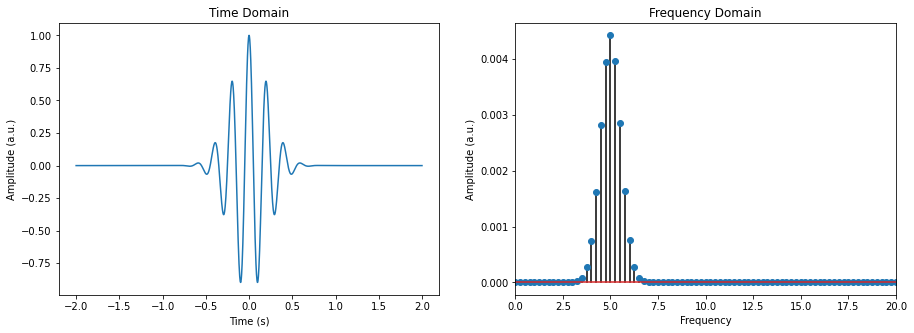

In [3]:
# Parameters
freq  =  5  # Hz
srate =  500  # Hz
fwhm  =  0.5
time  =  np.arange(-2*srate,2*srate+1/srate)/srate
npnts = len(time)

# I am creating our wavelet

wavelet = createRealWavelet(time,freq,fwhm)


# Getting the power spectrum of the wavelet

WaveletX = np.abs(np.fft.fft(wavelet/npnts))**2
hz = np.linspace(0,srate/2,int(npnts/2+1))

# Creating a figure with a 1x2 subplot geometry

fig,ax = plt.subplots(1,2,figsize = (15,5))
ax[0].plot(time,wavelet)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude (a.u.)")
ax[0].set_title("Time Domain")

ax[1].stem(hz,WaveletX[:len(hz)],'k')
ax[1].set_xlabel("Frequency")
ax[1].set_ylabel("Amplitude (a.u.)")
ax[1].set_xlim([0,20])
ax[1].set_title("Frequency Domain")
plt.show()

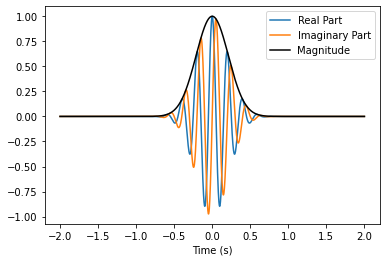

In [4]:
wavelet = createComplexWavelet(time,freq,fwhm)

plt.plot(time,np.real(wavelet),label = 'Real Part')
plt.plot(time,np.imag(wavelet),label = 'Imaginary Part')
plt.plot(time,np.abs(wavelet),'k',label= 'Magnitude')
plt.legend()
plt.xlabel('Time (s)')
plt.show()

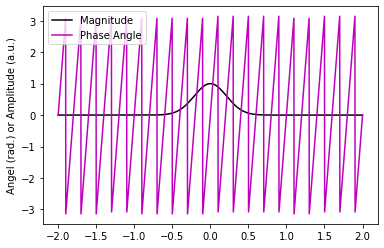

In [5]:
plt.plot(time,np.abs(wavelet),'k',label= 'Magnitude')
plt.plot(time, np.angle(wavelet),'m', label = 'Phase Angle')
plt.legend()
plt.ylabel('Angel (rad.) or Amplitude (a.u.)')
plt.show()

In [6]:
# Here I am creating the wavelet family

# parameters

lofreq  =  2
hifreq  =  80
numfrex = 42
frex    = np.linspace(lofreq,hifreq,numfrex)

fwhms    = np.linspace(1,1,numfrex)

In [7]:
# initializing the wavelet matrix 
waveletfam = np.zeros((numfrex,npnts),dtype = complex)

for wi in range(numfrex):
  waveletfam[wi,:] = createComplexWavelet(time,frex[wi],fwhms[wi])

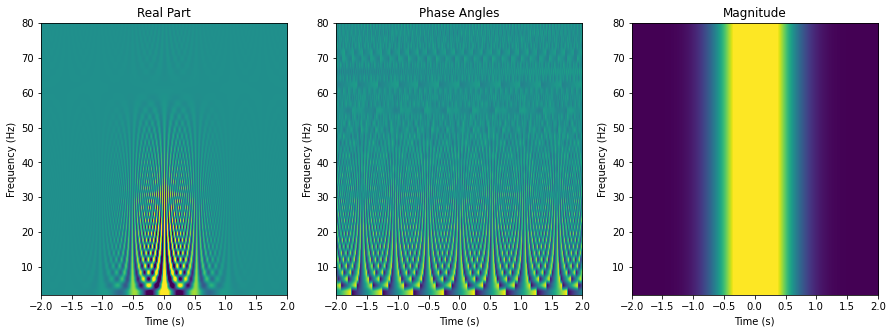

In [8]:
fig,ax = plt.subplots(1,3,figsize = (15, 5))

# First, I am showing the real part of the wavelet family

ax[0].imshow(np.real(waveletfam),aspect ='auto',origin ='lower',
             extent=[time[0],time[-1],lofreq,hifreq],
             vmin=-.7,vmax=.7)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Frequency (Hz)')
ax[0].set_title('Real Part')

# Secondly, I am showing the phase angle 

ax[1].imshow(np.angle(waveletfam),aspect ='auto',origin ='lower',
             extent=[time[0],time[-1],lofreq,hifreq],
             vmin=-3,vmax=3)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Frequency (Hz)')
ax[1].set_title('Phase Angles')

# Third, I am showing the magnitude of the wavelet family 

ax[2].imshow(np.abs(waveletfam),aspect ='auto',origin ='lower',
             extent=[time[0],time[-1],lofreq,hifreq],
             vmin=0,vmax=0.7)
ax[2].set_xlabel('Time (s)')
ax[2].set_ylabel('Frequency (Hz)')
ax[2].set_title('Magnitude')


plt.show()

In [9]:
# Importing the data

from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [10]:
EEG = loadmat ('/content/gdrive/MyDrive/Colab Notebooks/Data/MasterPython_CodeAndData/timeFrequencyAnalysis/sampleEEGdata.mat')



times = np.squeeze(EEG['EEG'][0][0][14])
data  = EEG['EEG'][0][0][15]
fs    = EEG['EEG'][0][0][11][0][0].astype(int) # this is the sampling rate

print(fs)
print(np.shape(times))
print(np.shape(data))

256
(640,)
(64, 640, 99)


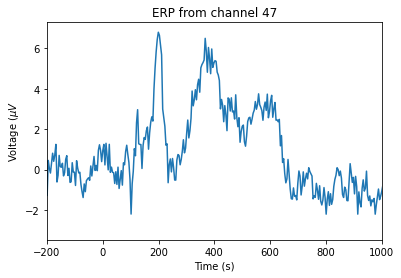

In [11]:
# Here I am creating the event-related potential (ERP)

erp = np.mean(data[46,:,:], axis = 1)

plt.plot(times,erp)
plt.xlim([-200,1000])
plt.xlabel('Time (s)')
plt.ylabel('Voltage ($\mu V$')
plt.title('ERP from channel 47')
plt.show()

In [12]:
# This part is the wavelet convolution

numfrex  =   40   # number of frequencies
lofreq   =    2   # Hz; lower bound
hifreq   =   30   # Hz; upper bound

frex     = np.linspace(lofreq,hifreq,numfrex)
fwhms    = np.linspace(1,.5,numfrex)


time = np.arange(-fs,fs+1)/fs





In [13]:
# initializing the wavelet matrix 
waveletfam = np.zeros((numfrex,len(time)),dtype = complex)

for wi in range(numfrex):
  waveletfam[wi,:] = createComplexWavelet(time,frex[wi],fwhms[wi])

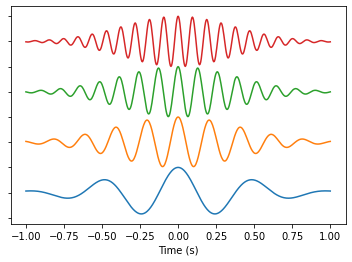

In [14]:
# plotting some selected wavelets
for i in range(4):

  plt.plot(time,np.real(waveletfam[i*4,:])+i*2)

plt.xlabel('Time (s)')
plt.tick_params(labelleft = False)
plt.show()

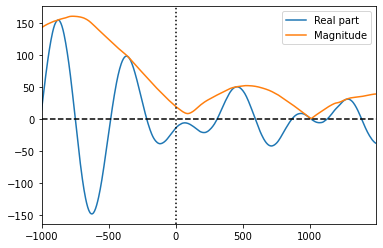

In [29]:
# Doing the Convolution 

convres = np.convolve(erp,waveletfam[0,:],mode='same')

plt.plot(times,np.real(convres),label ="Real part")
plt.plot(times,np.abs(convres),label ="Magnitude")
plt.plot([times[0],times[-1]],[0,0],'k--')
ylim=plt.ylim()
plt.plot([0,0],ylim,'k:')
plt.legend()
plt.xlim([times[0],times[-1]])
plt.ylim(ylim)
plt.show()

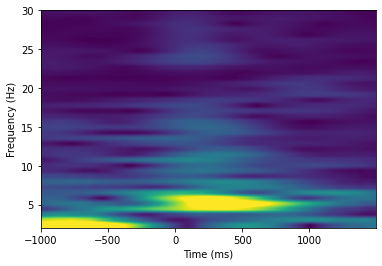

In [34]:
# initializing a matrix
tf=np.zeros((numfrex,len(times)))

# I am looping over frequencies to implement convolution
for wi in range(numfrex):
  convres = np.convolve(erp,waveletfam[wi,:],mode='same')
  tf[wi,:] = np.abs(convres)



# Then creating the image
plt.imshow(tf,origin='lower',
           aspect='auto',vmax=100,
           extent=[times[0],times[-1],lofreq,hifreq])

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.show()